In [1]:
import matplotlib.pyplot as plt

import numpy as np

In [2]:
import surp
import arya

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
fiducial = surp.ViceModel.from_saved("../../models/C11_f0.2/model.json")

In [4]:
h = fiducial.history

# Star Formation History
Should go as the two part power law

In [5]:
def sfh_model(t, tau_sfh, tau_rise):
    return np.exp(-t/tau_sfh) * (1 - np.exp(-t/tau_rise))

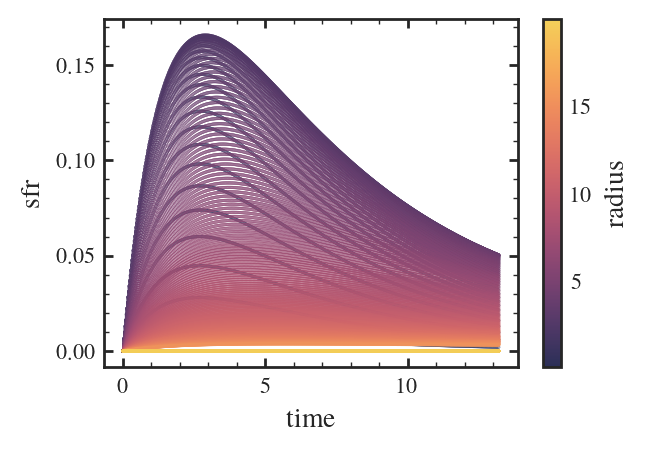

In [6]:
plt.scatter(h.time, h.sfr, c=h.R, s=0.01)
plt.xlabel("time")
plt.ylabel("sfr")
plt.colorbar(label="radius")

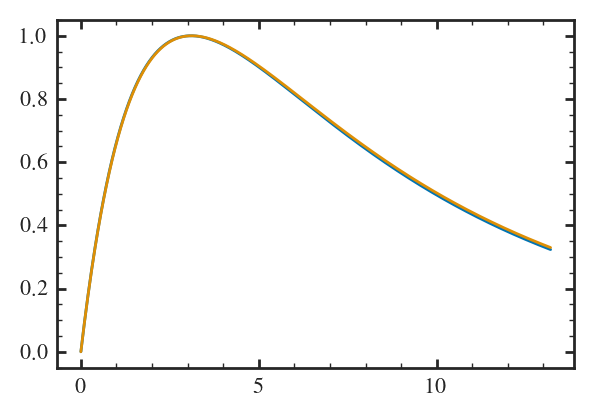

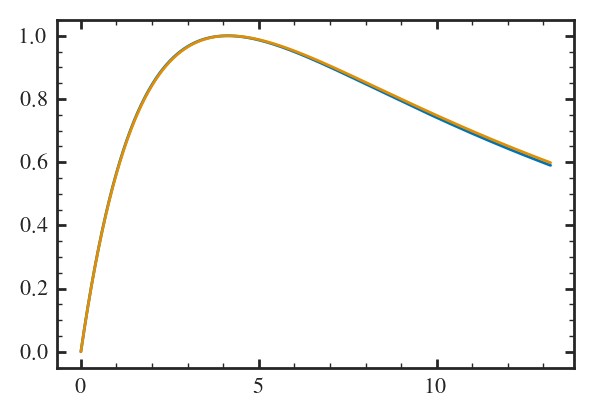

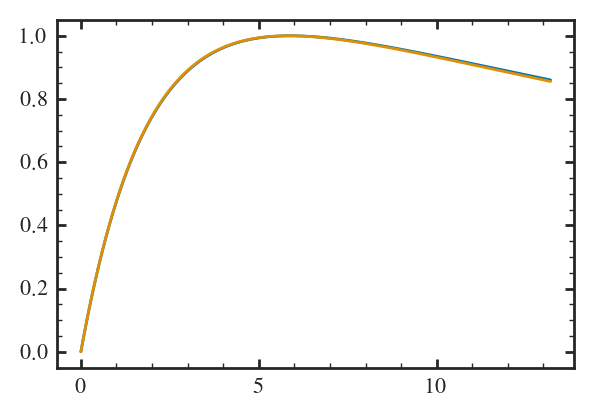

In [7]:
for R, tau_sfh in [(3.05, 7.5), (7.05, 14), (15.05, 35)]:
    tau_rise = 2
    filt = np.isclose(h.R, R)
    h1 = h[filt]
    plt.plot(h1.time, h1.sfr / np.max(h1.sfr))
    y = sfh_model(h1.time, tau_sfh, tau_rise)
    plt.plot(h1.time, y/np.max(y) )
    plt.show()

In [8]:
t_end = np.max(h.time)

In [9]:
h_end = h[h.time == t_end]

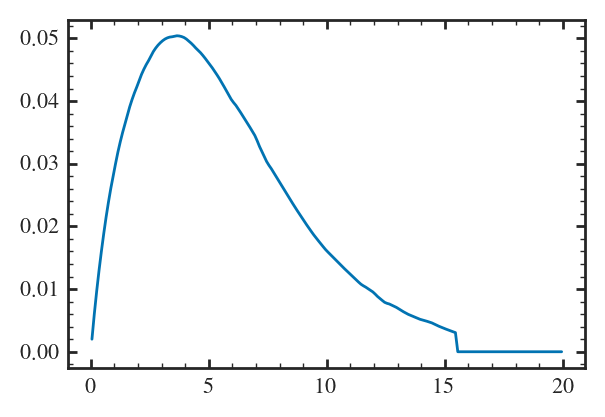

In [10]:
plt.plot(h_end.R, h_end.sfr)

In [11]:
dR = h_end.R[1] - h_end.R[0]

/tmp/slurmtmp.27878957/ipykernel_26351/243264679.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dR = h_end.R[1] - h_end.R[0]


Text(0.5, 0, 'R')

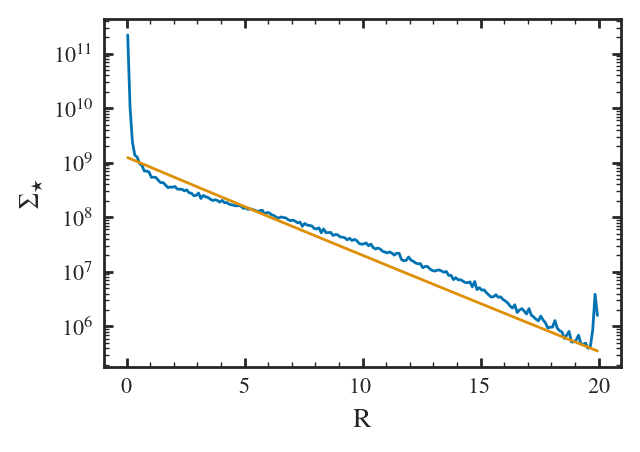

In [12]:
A = (2*np.pi * h_end.R * dR).values
plt.plot(h_end.R, h_end.mstar / A)
#plt.plot(h_end.R, h_end.mgas / A)

plt.yscale("log")
#plt.xscale("log")
plt.plot(h_end.R, 1e9*(np.exp(-h_end.R / 2.5) + 0.27*np.exp(-h_end.R / 2.0)))
plt.ylabel(r"$\Sigma_\star$")
plt.xlabel("R")


star formation densities are okay. divergence at centre is likely a result of migration but may not even be that unphysical.

In [13]:
print("%0.2e" % np.sum(h_end.mstar)) # total mass should be 5.17 x 10^10 solar masses

5.34e+10


# SFR Law

In [14]:
def KS_law(Σg):
    # sfr density as a function of gas mass
    Σ1 = 2e7
    Σ2 = 5e6
    γ1 = 1
    γ2 = 3.6
    γ3 = 1.7
    
    C1 = Σ2**(γ3 - γ2) * Σ1**(γ2 - γ1)
    C2 = Σ2**(γ3 - γ2)
    norm = 1/2.1 / C1

    s = 0
    s += np.where(Σ1 < Σgas , C1 * Σgas ** γ1, 0)
    s += np.where((Σ2 < Σgas) & (Σgas <= Σ1), C2 * Σgas ** γ2, 0)
    s += np.where(Σgas <= Σ2, Σgas**γ3, 0)
    return norm*s

In [15]:
Σgas = h_end.mgas/A

1/(h_end.sfr / A / Σgas * 1e9)[np.isclose(h_end.R, 7.05)]

46930    2.461808
dtype: float64

(1.0, 25.680655697936185)

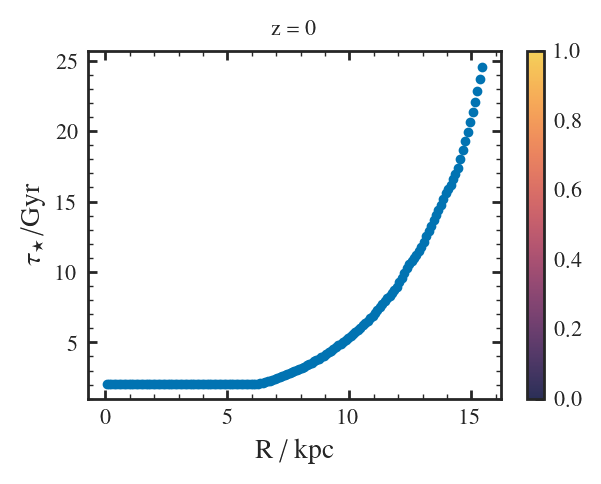

In [16]:
Σgas = h_end.mgas/A
plt.scatter(h_end.R, 1/(h_end.sfr / A / Σgas * 1e9))
plt.colorbar()
Σgas = np.linspace(1e6, 1e9, 1000)
plt.xlabel(r"R / kpc")
plt.ylabel(r"$\tau_\star\,$/Gyr")
plt.title("z = 0")
plt.ylim(1)


(1, 301.92241914187997)

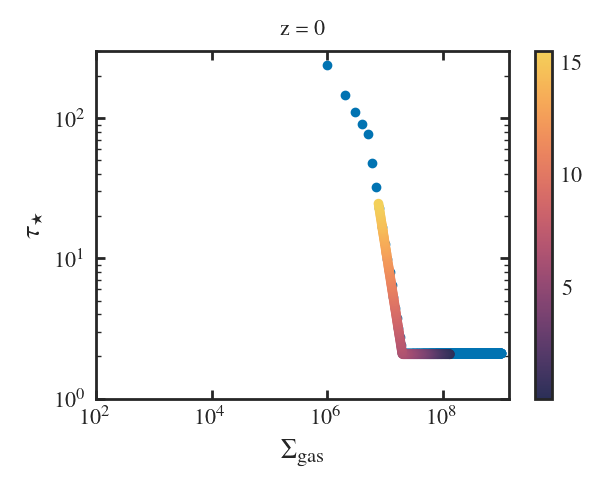

In [17]:
Σgas = h_end.mgas/A
plt.scatter(Σgas, 1/(h_end.sfr / A / Σgas * 1e9), c=h_end.R, zorder=5)
plt.colorbar()
Σgas = np.linspace(1e6, 1e9, 1000)
plt.scatter(Σgas, Σgas / KS_law(Σgas))
plt.xlabel(r"$\Sigma_{\rm gas}$")
plt.ylabel(r"$\tau_\star$")
plt.yscale("log")
plt.xscale('log')
plt.xlim(1e2)
plt.title("z = 0")
plt.ylim(1)


In [18]:
np.log10(2)

0.3010299956639812

In [19]:
def log_t_dep(log_z):
    At = 0.089
    Bt = -0.62
    return  Bt*log_z # ignoring offset

def t_dep_factor(z):
    return 10**log_t_dep(np.log10(1+z))

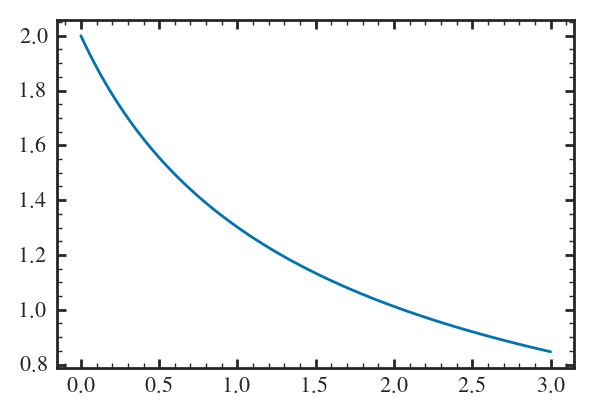

In [20]:
z = np.linspace(0, 3, 100)
plt.plot(z, t_dep_factor(z) * 2)


(100000.0, 12732278758.242096)

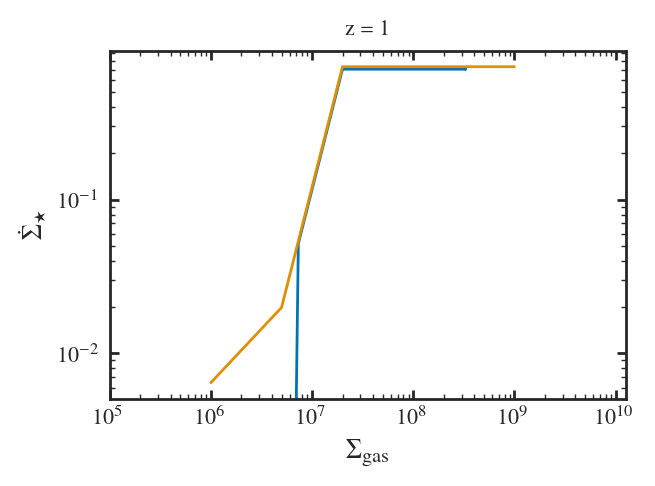

In [21]:
filt = np.isclose(h.time, 13.2 - 7.8)
h1 = h[filt]

Σgas = h1.mgas/A
plt.plot(Σgas, h1.sfr / A / Σgas * 1e9)
Σgas = np.linspace(1e6, 1e9, 1000)

plt.plot(Σgas, KS_law(Σgas)/ Σgas / t_dep_factor(1))
plt.xlabel(r"$\Sigma_{\rm gas}$")
plt.ylabel(r"$\dot{\Sigma}_\star$")
plt.yscale("log")
plt.xscale('log')
plt.title("z = 1")
plt.xlim(1e5)

(1, 12732278758.242096)

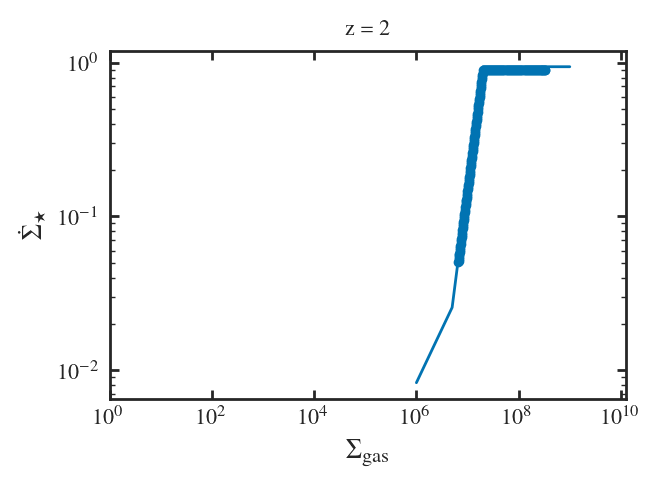

In [22]:
filt = np.isclose(h.time, 13.2 - 10.4)
h1 = h[filt]

Σgas = h1.mgas/A
plt.scatter(Σgas, h1.sfr / A / Σgas * 1e9)
Σgas = np.linspace(1e6, 1e9, 1000)

plt.plot(Σgas, KS_law(Σgas)/ Σgas /  t_dep_factor(2))
plt.xlabel(r"$\Sigma_{\rm gas}$")
plt.ylabel(r"$\dot{\Sigma}_\star$")
plt.yscale("log")
plt.xscale('log')
plt.title("z = 2")
plt.xlim(1)

ks law verified !!!

# Outflows and yields

Text(0, 0.5, '$\\eta$')

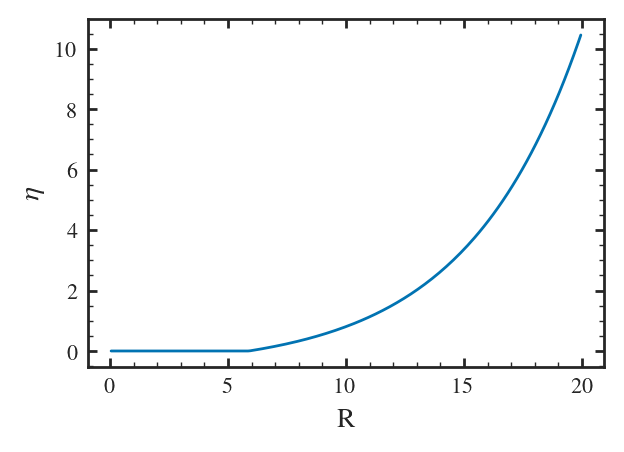

In [23]:
plt.plot(h_end.R, h_end.eta_0)
plt.xlabel("R")
plt.ylabel(r"$\eta$")

In [24]:
from surp.simulation.properties import MH_grad

Text(0, 0.5, '[M/H]')

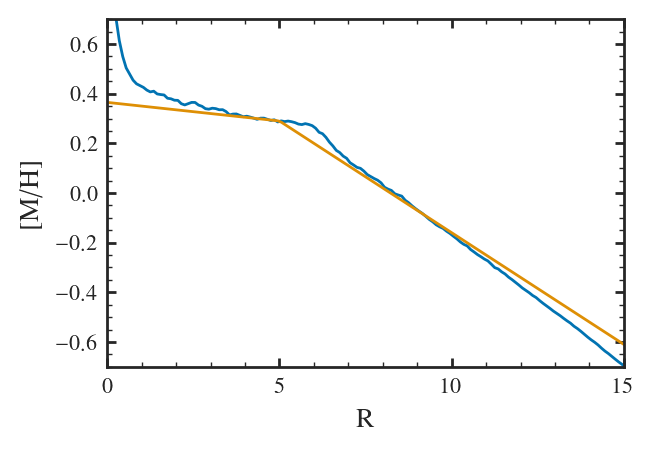

In [25]:
plt.plot(h_end.R, h_end.M_H)
y = MH_grad()(h_end.R)
plt.plot(h_end.R, y)

plt.xlim(0, 15)
plt.ylim(-0.7, 0.7)
plt.xlabel("R")
plt.ylabel(r"[M/H]")

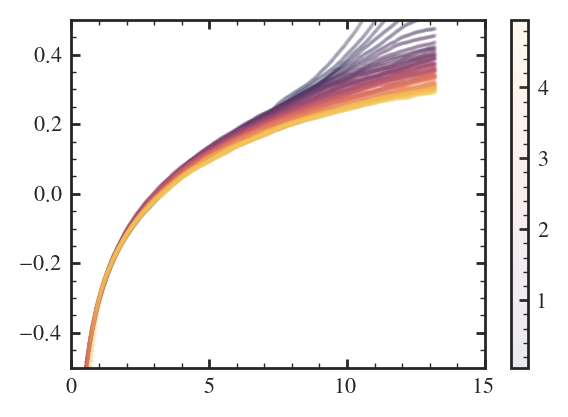

In [26]:
filt = h.R < 5
df = h[filt]
plt.scatter(df.time, df.MG_H, s=0.3, alpha=0.1, c=df.R)
plt.xlim(0, 15)
plt.ylim(-0.5, 0.5)
plt.colorbar()

# Migration

In [27]:
s = fiducial.stars_unsampled

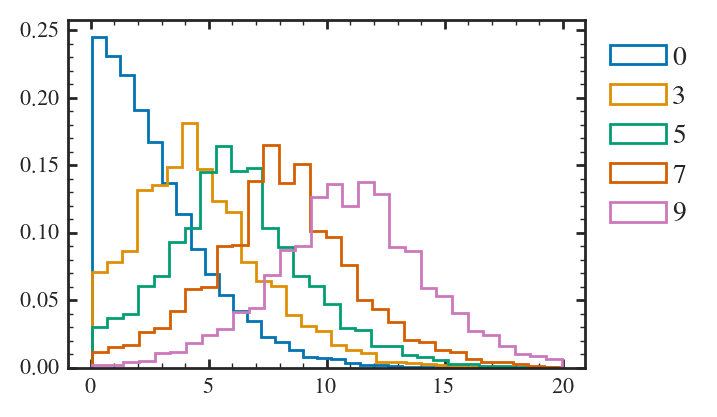

In [28]:
r_bins = [0, 3, 5, 7, 9, 13]
Nbins = len(r_bins) - 1
for i in range(Nbins):
    filt = s.r_final >= r_bins[i]
    filt &= s.r_final < r_bins[i+1]
    plt.hist(s[filt].r_origin, 30, histtype="step", density=True, label=r_bins[i])
arya.Legend(-1)

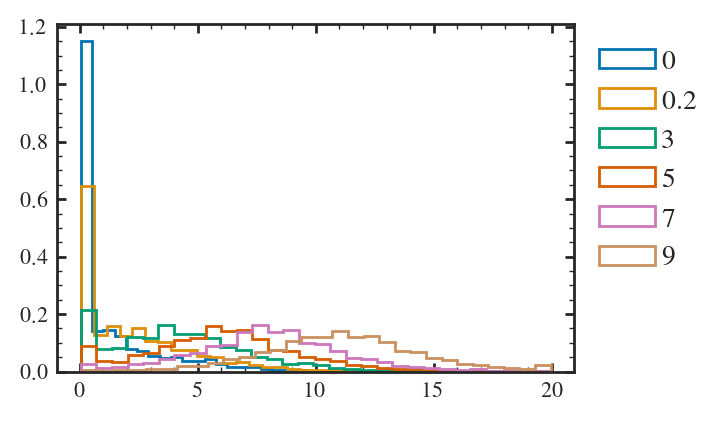

In [29]:
r_bins = [0, 0.2, 3, 5, 7, 9, 13]
Nbins = len(r_bins) - 1
for i in range(Nbins):
    filt = s.r_origin >= r_bins[i]
    filt &= s.r_origin < r_bins[i+1]
    plt.hist(s[filt].r_final, 30, histtype="step", density=True, label=r_bins[i])
arya.Legend(-1)

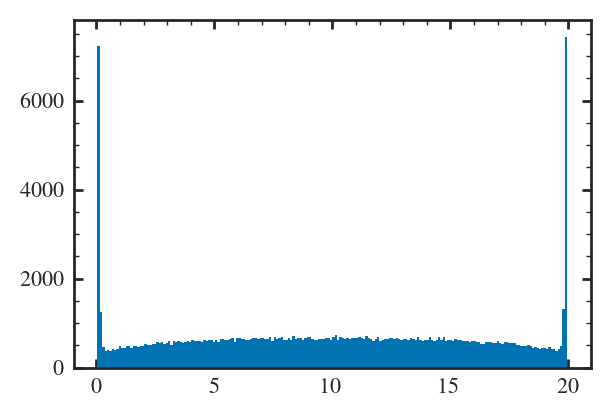

In [30]:
plt.hist(s.r_final, 200, ec="none");